In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Set seed for reproducibility
np.random.seed(42)

In [3]:
# Function to generate apple weight data for different farms
def generate_apple_weights(mean, std_dev, size, farm_name):
    """
    Generate random apple weights for a farm using normal distribution.
    
    Parameters:
    - mean: float, mean apple weight
    - std_dev: float, standard deviation of apple weights
    - size: int, number of apples
    - farm_name: str, name of the farm for labeling
    
    Returns:
    - weights: array of apple weights
    """
    return np.random.normal(loc=mean, scale=std_dev, size=size)

In [4]:
# Generating random apple weight data for three farms
farm_a_apple_weights = generate_apple_weights(148, 10, 50, "Farm A")
farm_b_apple_weights = generate_apple_weights(150, 10, 50, "Farm B")
farm_c_apple_weights = generate_apple_weights(152, 10, 50, "Farm C")

# Combine data into one array for potential future use
apple_weights = np.concatenate((farm_a_apple_weights, farm_b_apple_weights, farm_c_apple_weights))

# Group labels for potential use in future visualizations or stats
groups = np.concatenate((
    np.full_like(farm_a_apple_weights, 0),
    np.full_like(farm_b_apple_weights, 1),
    np.full_like(farm_c_apple_weights, 2)
))

# Perform one-way ANOVA to test for significant differences between the groups
f_stat, p_value = stats.f_oneway(farm_a_apple_weights, farm_b_apple_weights, farm_c_apple_weights)


In [5]:
# Display the results of the ANOVA test
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")

F-statistic: 5.25
p-value: 0.0063


In [6]:
# Set significance level for the hypothesis test
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Result: Reject the null hypothesis.")
    print("There is a significant difference in the average apple weights between the farms.")
else:
    print("Result: Fail to reject the null hypothesis.")
    print("There is no significant difference in the average apple weights between the farms.")

Result: Reject the null hypothesis.
There is a significant difference in the average apple weights between the farms.


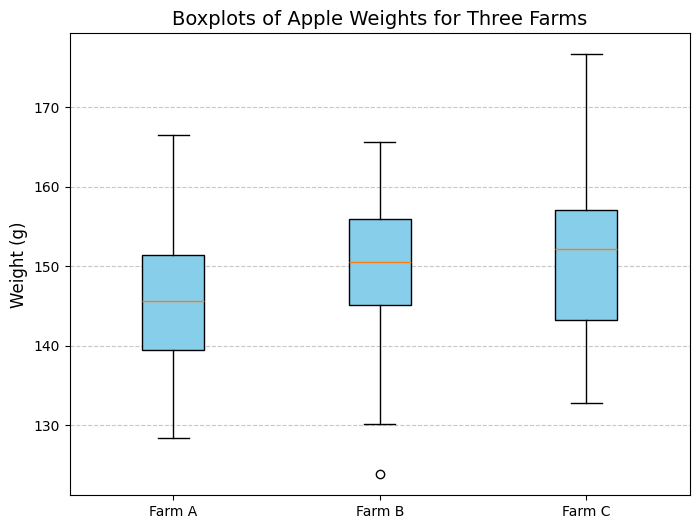

In [7]:
# Visualization: Boxplot of apple weights for the three farms
plt.figure(figsize=(8, 6))
plt.boxplot(
    [farm_a_apple_weights, farm_b_apple_weights, farm_c_apple_weights],
    labels=["Farm A", "Farm B", "Farm C"],
    patch_artist=True,
    boxprops=dict(facecolor='skyblue')
)
plt.title("Boxplots of Apple Weights for Three Farms", fontsize=14)
plt.ylabel("Weight (g)", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

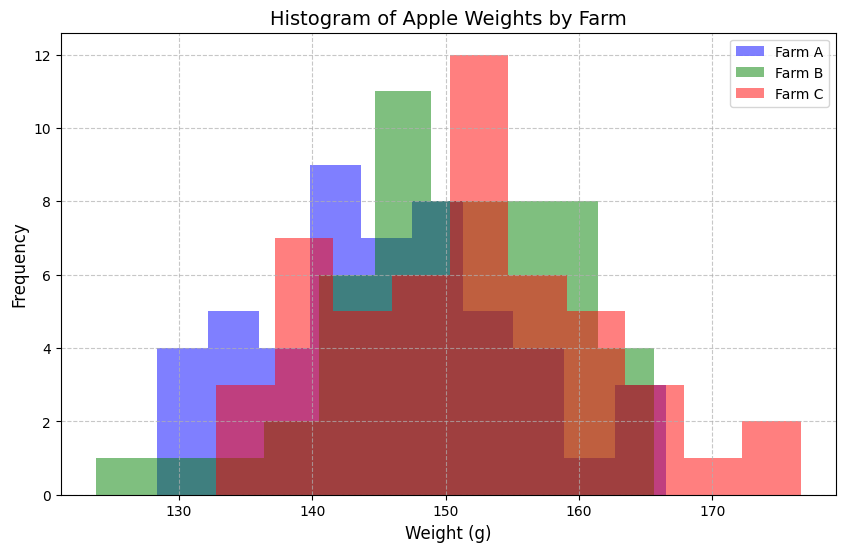

In [8]:
# Expanded Visualization: Distribution of Apple Weights
plt.figure(figsize=(10, 6))
plt.hist(farm_a_apple_weights, bins=10, alpha=0.5, label='Farm A', color='blue')
plt.hist(farm_b_apple_weights, bins=10, alpha=0.5, label='Farm B', color='green')
plt.hist(farm_c_apple_weights, bins=10, alpha=0.5, label='Farm C', color='red')
plt.title('Histogram of Apple Weights by Farm', fontsize=14)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()